<a href="https://colab.research.google.com/github/yashgandhijee2018/Fundamentals-of-Machine-Learning/blob/main/Devanagari%20Character%20Set%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#importing necessary libraries
import os
import keras
import matplotlib
import numpy as np
import skimage.io as io
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.utils import *
from keras.optimizers import Adam
from keras.models import *
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import model_selection

In [3]:
# reading data from the disk storage
data= pd.read_csv(r'/content/drive/My Drive/devanagari-character-set.csv')
data.shape

# shape of the data is 92000 images
# and each image is 32x32 with 28 pixels of the region representing the actual text
# and 4 pixels as padding

(92000, 1025)

In [4]:
# data=data.sample(n=50000,random_state=6,replace=True)
# data.shape
size=data.shape[0]
print("The size of our dataset is "+str(size))

The size of our dataset is 92000


In [5]:
# for both our training and testing data
#summary of each attribute
print(data.describe())

       pixel_0000  pixel_0001  pixel_0002  ...  pixel_1021  pixel_1022  pixel_1023
count     92000.0     92000.0     92000.0  ...     92000.0     92000.0     92000.0
mean          0.0         0.0         0.0  ...         0.0         0.0         0.0
std           0.0         0.0         0.0  ...         0.0         0.0         0.0
min           0.0         0.0         0.0  ...         0.0         0.0         0.0
25%           0.0         0.0         0.0  ...         0.0         0.0         0.0
50%           0.0         0.0         0.0  ...         0.0         0.0         0.0
75%           0.0         0.0         0.0  ...         0.0         0.0         0.0
max           0.0         0.0         0.0  ...         0.0         0.0         0.0

[8 rows x 1024 columns]


In [6]:
#creating a temp type array of our dataset
array=data.values
#X is for input values and Y is for output given on that input attributes
X=array[:,0:1024].astype(float)
Y=array[:,1024]

## Preprocessing of Y values

In [7]:
print(Y[0])

character_01_ka


In [8]:
#collecting the digit value from Y[i]
i=0
Y_changed=np.ndarray(Y.shape)
for name in Y:
    x = name.split('_')
    
    if(x[0]=='character'):
        Y_changed[i]=int(x[1])
    elif x[0]=='digit':
        Y_changed[i]=(37 + int(x[1]))
    i=i+1
    
# copy the contents of the array to our original array
Y=Y_changed

#removing the extra elements after memory allocation for numpy array
Y=Y[0:size].copy()
print("The processed Y shape is "+str(Y.shape))

The processed Y shape is (92000,)


## Train and Test Split

In [9]:
#size of the testing data
validation_size=0.20
#seed value for keeping same randomness in training and testing dataset
seed=6
#splitting of the data
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [10]:
X_test.shape

(18400, 1024)

In [11]:
# reshaping the data in order to convert the given 1D array of an image to actual grid representaion
X_train = X_train.reshape((size*4)//5,32,32,1)
print(X_train.shape)
Y_train = Y_train.reshape((size*4)//5,1)
print(Y_train.shape)
X_test = X_test.reshape(size//5,32,32,1)
print(X_test.shape)
Y_test = Y_test.reshape(size//5,1)
print(Y_test.shape)

(73600, 32, 32, 1)
(73600, 1)
(18400, 32, 32, 1)
(18400, 1)


In [12]:
# a reference array for final classification of data
reference = {1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha', 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}
# to return a group of the key-value 
# pairs in the dictionary 
# temp = valid_characters.items() 
  
# # Convert object to a list 
# data = list(temp) 
  
# # Convert list to an array 
# reference = np.array(data) 

# # print the numpy array 
print(reference)
print(type(reference))

{1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha', 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}
<class 'dict'>


In [13]:
#normalization of data
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2)
X_test, Y_test = shuffle(X_test, Y_test, random_state = 2)

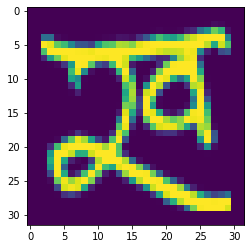

kha


In [15]:
plt.imshow(np.squeeze(X_test[256]))
plt.show()
print(reference.get(int(Y_test[256])))

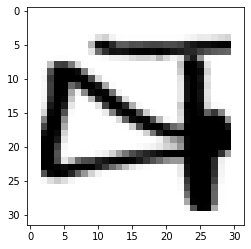

petchiryakha


In [16]:
#greyscale image
plt.imshow(np.squeeze(X_test[67]),cmap=matplotlib.cm.binary,interpolation="nearest")
plt.show()
print(reference.get(int(Y_test[67])))

In [17]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

(7360, 32, 32, 1)
(11040, 32, 32, 1)


In [18]:
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(7360, 47)


In [19]:
Y_val = to_categorical(Y_val)
print(Y_val.shape)

(11040, 47)


In [20]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)

(73600, 47)


In [21]:
inputs = Input(shape = (32,32,1))
conv1 = Conv2D(64, 3, padding='same', activation='relu')(inputs)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(128, activation='relu')(dense0)
dense2 = Dense(47, activation='softmax')(dense1)

model = Model(inputs, dense2)
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)        

In [22]:
model.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 400, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/20
184/184 [==============================] - 22s 118ms/step - loss: 0.7362 - accuracy: 0.7996 - val_loss: 0.1206 - val_accuracy: 0.9644
Epoch 2/20
184/184 [==============================] - 22s 117ms/step - loss: 0.0746 - accuracy: 0.9773 - val_loss: 0.0730 - val_accuracy: 0.9779
Epoch 3/20
184/184 [==============================] - 22s 119ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0601 - val_accuracy: 0.9812
Epoch 4/20
184/184 [==============================] - 22s 122ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0649 - val_accuracy: 0.9829
Epoch 5/20
184/184 [==============================] - 23s 125ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0593 - val_accuracy: 0.9854
Epoch 6/20
184/184 [==============================] - 23s 127ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0598 - val_accuracy: 0.9836
Epoch 7/20
184/184 [==============================] - 23s 127ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0578 - val_ac

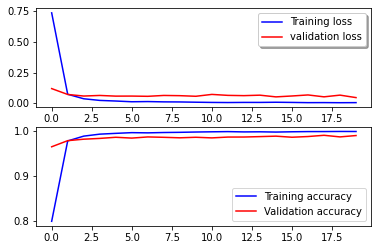

In [23]:

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=False)

In [24]:
model.save("/content/drive/My Drive/Model_1.h5")

In [25]:
model.evaluate(X_test, Y_test, batch_size = 400, verbose =1)

19/19 [==============================] - 1s 50ms/step - loss: 0.0537 - accuracy: 0.9875


[0.0536993108689785, 0.987500011920929]

In [26]:
predicted = model.predict(x = X_test, verbose = 1)

230/230 [==============================] - 1s 5ms/step


In [27]:
predicted.shape


(7360, 47)

jha


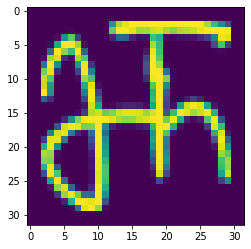

In [28]:
index = 57
img = X_test[index]
img = img.reshape((32,32))
plt.imshow(img)
predicted = np.argmax(predicted, axis = 1)
print(reference[predicted[index]])

# Second Model